In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_context('poster', font_scale=1.25)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from LB_D2Q9.dimensionless import opencl_dim as lb_cl

# Checking that refining resolution gives us the same result

We create simulations at different resolutions with the same Reynold's number.

In [5]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -1 # Pa/m

pipe_length = 3*D # meter

sim0 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=25, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 8.0
Reynolds number: 0.015625
omega 0.00519480519481
2d global: (96, 32)
2d local: (32, 32)
3d global: (96, 32, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices
inlet rho: 1.933888
outlet rho: 1.0


/home/bryan/anaconda/lib/python2.7/site-packages/pyopencl/__init__.py:59: CompilerWarning: Built kernel retrieved from cache. Original from-source build had warnings:
Build on <pyopencl.Device 'Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz' on 'Intel(R) OpenCL' at 0x3ca6dd8> succeeded, but said:

Compilation started
Compilation done
Linking started
Linking done
Device build started
Device build done
Kernel <update_feq> was successfully vectorized (8)
Kernel <update_hydro> was successfully vectorized (4)
Kernel <collide_particles> was successfully vectorized (4)
Kernel <copy_buffer> was successfully vectorized (4)
Kernel <move> was successfully vectorized (4)
Kernel <move_bcs> was successfully vectorized (4)
Kernel <move_bcs_PeriodicBC_VelocityInlet> was successfully vectorized (4)
Kernel <update_hydro_PeriodicBC_VelocityInlet> was successfully vectorized (4)
Kernel <set_zero_velocity_in_obstacle> was successfully vectorized (4)
Kernel <bounceback_in_obstacle> was not vectorized
Done.
  warn

In [7]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim1 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=50, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
omega 0.413223140496
2d global: (160, 64)
2d local: (32, 32)
3d global: (160, 64, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices
inlet rho: 1.0231936
outlet rho: 1.0


/home/bryan/anaconda/lib/python2.7/site-packages/pyopencl/__init__.py:59: CompilerWarning: Built kernel retrieved from cache. Original from-source build had warnings:
Build on <pyopencl.Device 'Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz' on 'Intel(R) OpenCL' at 0x1fa8768> succeeded, but said:

Compilation started
Compilation done
Linking started
Linking done
Device build started
Device build done
Kernel <update_feq> was successfully vectorized (8)
Kernel <update_hydro> was successfully vectorized (4)
Kernel <collide_particles> was successfully vectorized (4)
Kernel <copy_buffer> was successfully vectorized (4)
Kernel <move> was successfully vectorized (4)
Kernel <move_bcs> was successfully vectorized (4)
Kernel <move_bcs_PeriodicBC_VelocityInlet> was successfully vectorized (4)
Kernel <update_hydro_PeriodicBC_VelocityInlet> was successfully vectorized (4)
Kernel <set_zero_velocity_in_obstacle> was successfully vectorized (4)
Kernel <bounceback_in_obstacle> was not vectorized
Done.
  warn

In [8]:
D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -10 # Pa/m

pipe_length = 3*D # meter

sim2 = lb_cl.Pipe_Flow(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                       N=150, time_prefactor=1.,
                       two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 1.0
Characteristic T: 0.8
Reynolds number: 1.5625
omega 0.413223140496
2d global: (480, 160)
2d local: (32, 32)
3d global: (480, 160, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
Intel(R) OpenCL Intel(R) Corporation version: OpenCL 1.2 LINUX
The devices detected on platform Intel(R) OpenCL are:
---------------------------
       Intel(R) Core(TM) i7-3537U CPU @ 2.00GHz [Type: CPU ]
Maximum clock Frequency: 2000 MHz
Maximum allocable memory size: 2062 MB
Maximum work group size 8192
Maximum work item dimensions 3
Maximum work item size [8192, 8192, 8192]
---------------------------
This context is associated with  1 devices
inlet rho: 1.00256568889
outlet rho: 1.0


We run each simulation for the same amount of time when approaching the steady state. This is a little tricky as each simulation has a different time step.

In [6]:
time_to_run = 5 # dimensionless time
num_steps = int(time_to_run/sim0.delta_t)
print 'Running for', num_steps
sim0.run(num_steps)

Running for 3125


In [11]:
time_to_run = 5 # seconds

In [12]:
num_steps = int(time_to_run/sim1.delta_t)
print 'Running for', num_steps

Running for 1250


In [13]:
sim1.run(num_steps)

In [14]:
num_steps = int(time_to_run/sim2.delta_t)
print 'Running for', num_steps

Running for 11249


In [15]:
sim2.run(num_steps)

We now plot each simulation's solution to make sure that they look the same.

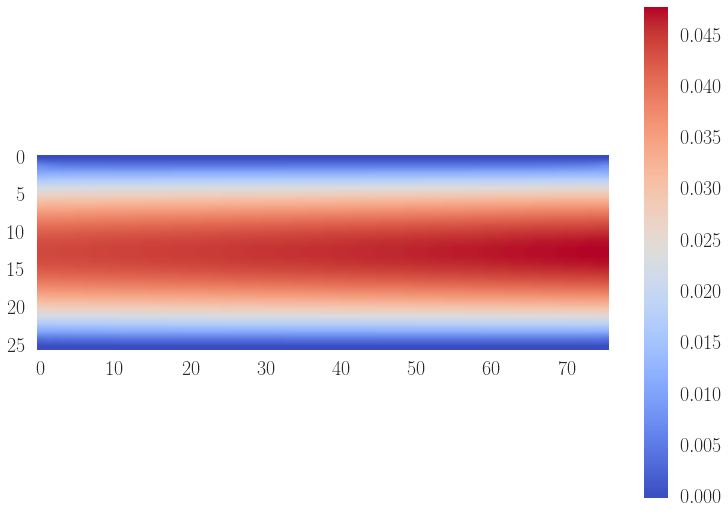

In [16]:
fields = sim0.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

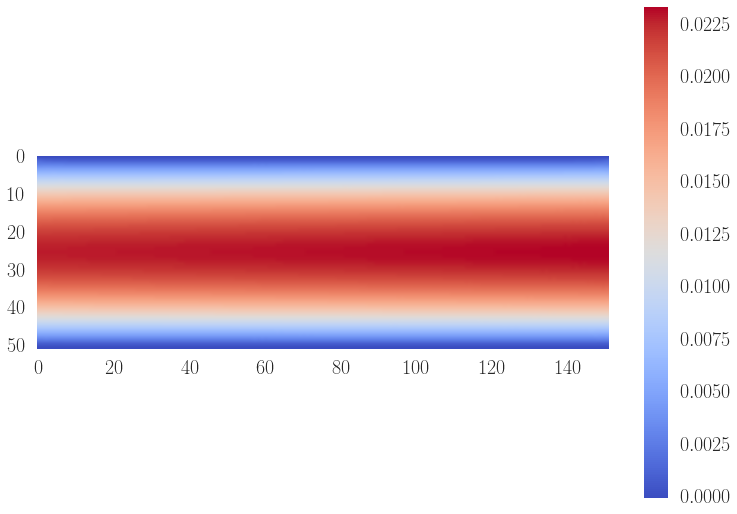

In [17]:
fields = sim1.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

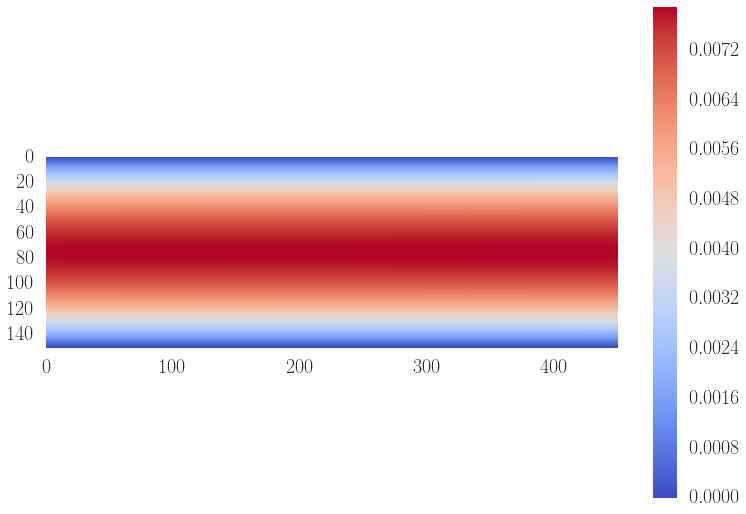

In [18]:
fields = sim2.get_fields()
plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)

plt.colorbar()

We make a plot of our pipe flow solution. sim2 is the highest resolution and consequently looks the best!

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

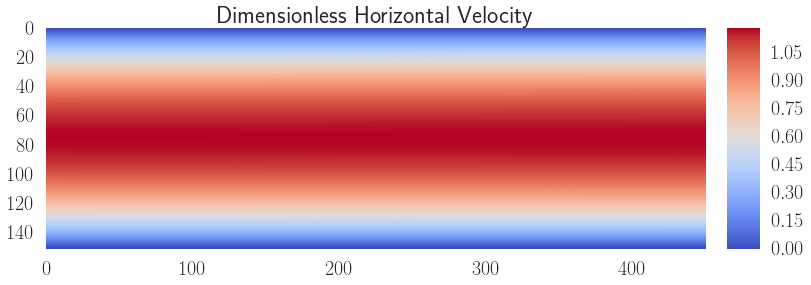

In [20]:
fields = sim2.get_nondim_fields()
im = plt.imshow(fields['u'].T, cmap=cm.coolwarm)
plt.grid(False)
plt.title('Dimensionless Horizontal Velocity')

divider = make_axes_locatable(plt.gca())
cax = divider.append_axes('right', size='5%', pad=0.3)
plt.colorbar(im, cax=cax)

plt.savefig('standard_pipe_flow.png', dpi=200, bbox_inches='tight')

In [21]:
sns.set_style('ticks')

In [22]:
import matplotlib

In [23]:
matplotlib.rc('text', usetex=True)

We now compare our simulations with theory.

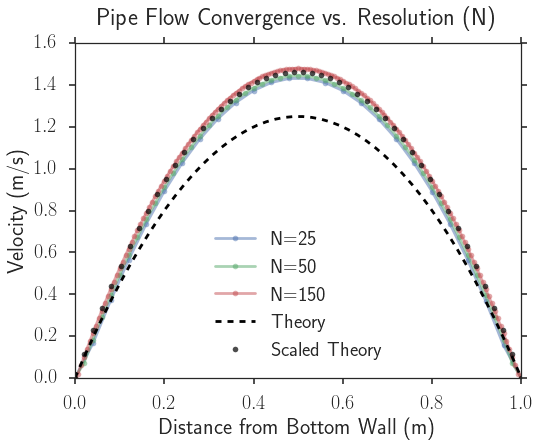

In [38]:
fields0 = sim0.get_physical_fields()
fields1 = sim1.get_physical_fields()
fields2 = sim2.get_physical_fields()

x_values = np.arange(fields0['u'].T.shape[0])*sim0.delta_x*sim0.L
# Get the mean velocity in the x direction
mean_u = fields0['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=25', ls='-', marker='.', alpha=0.5)


x_values = np.arange(fields1['u'].T.shape[0])*sim1.delta_x*sim1.L
# Get the mean velocity in the x direction
mean_u = fields1['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=50', ls='-', marker='.', alpha=0.5)

x_values = np.arange(fields2['u'].T.shape[0])*sim2.delta_x*sim2.L
mean_u = fields2['u'].T.mean(axis=1)
plt.plot(x_values, mean_u, label='N=150', ls='-', marker='.', alpha=0.5)

prefactor = (1./(2*rho*nu))*pressure_grad
y = np.linspace(0, D)

predicted = prefactor*y*(y-D)
# Convert non-dim predicted

plt.plot(y, predicted, label='Theory', color='Black', ls='--')

plt.plot(y, predicted*1.17, label='Scaled Theory', color='k', ls='', marker='.', alpha=0.7)

plt.xlabel('Distance from Bottom Wall (m)')
plt.ylabel('Velocity (m/s)')

plt.title('Pipe Flow Convergence vs. Resolution (N)', y=1.04)

plt.legend(loc='best')

plt.gcf().set_size_inches(8, 6)

plt.savefig('resolution_convergence_nonscaled.png', dpi=200, bbox_inches='tight')

Well, they are *extremely* close now. That's good at least. I'm not exactly sure why the simulations don't line up exactly with the theory. It could be the less accurate boundary conditions we used.

Let's calculate the reynold's #'s of our simulation empirically.

In [30]:
f1 = sim1.get_fields()

In [31]:
u_lb = np.max(np.abs(f1['u']))
N_lb = sim1.N
nu_lb = sim1.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.82637639227


In [32]:
f2 = sim2.get_fields()

In [33]:
u_lb = np.max(f2['u'])
N_lb = sim2.N
nu_lb = sim2.lb_viscosity

print (u_lb*N_lb)/nu_lb

1.85197059182


Ok. The reynold's #'s are the same for the two, but are not what we expect analytically, so there is something slightly wrong. Luckily, they are not too far off! This is probably fine for now, but I would like to fix this in the future.